<h1 style= "color:red">Chronic Kidney Disease (CKD) Prediction</h1>

<h3>This project aims to build a machine learning model to predict the presence of Chronic Kidney Disease (CKD) using patient clinical data. The goal is to create an accurate and interpretable model that can assist healthcare professionals in early diagnosis.</h3>


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score 

## Data Loading and Inspection

We begin by loading the dataset and inspecting its structure, size, and types of features. This helps us understand the data we are working with and identify any immediate data quality issues.

We also check the distribution of the target variable (`Diagnosis`) to see if the dataset is imbalanced.


In [3]:
#Reading the csv file
data = pd.read_csv("E:\PROJECTS\CKD-PREDICITON PROJECT\Chronic_Kidney_Dsease_data.csv")
print(data.head())

   PatientID  Age  Gender  Ethnicity  SocioeconomicStatus  EducationLevel  \
0          1   71       0          0                    0               2   
1          2   34       0          0                    1               3   
2          3   80       1          1                    0               1   
3          4   40       0          2                    0               1   
4          5   43       0          1                    1               2   

         BMI  Smoking  AlcoholConsumption  PhysicalActivity  ...   Itching  \
0  31.069414        1            5.128112          1.676220  ...  7.556302   
1  29.692119        1           18.609552          8.377574  ...  6.836766   
2  37.394822        1           11.882429          9.607401  ...  2.144722   
3  31.329680        0           16.020165          0.408871  ...  7.077188   
4  23.726311        0            7.944146          0.780319  ...  3.553118   

   QualityOfLifeScore  HeavyMetalsExposure  OccupationalExposureChem

In [4]:
print("Dataset Shape:", data.shape)

Dataset Shape: (1659, 54)


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PatientID                      1659 non-null   int64  
 1   Age                            1659 non-null   int64  
 2   Gender                         1659 non-null   int64  
 3   Ethnicity                      1659 non-null   int64  
 4   SocioeconomicStatus            1659 non-null   int64  
 5   EducationLevel                 1659 non-null   int64  
 6   BMI                            1659 non-null   float64
 7   Smoking                        1659 non-null   int64  
 8   AlcoholConsumption             1659 non-null   float64
 9   PhysicalActivity               1659 non-null   float64
 10  DietQuality                    1659 non-null   float64
 11  SleepQuality                   1659 non-null   float64
 12  FamilyHistoryKidneyDisease     1659 non-null   i

In [6]:
print(data['Diagnosis'].value_counts())

Diagnosis
1    1524
0     135
Name: count, dtype: int64


In [7]:
print(data['DoctorInCharge'].head())

0    Confidential
1    Confidential
2    Confidential
3    Confidential
4    Confidential
Name: DoctorInCharge, dtype: object


## Exploratory Data Analysis (EDA)

Here, we analyze the distribution of key features and the target variable. Visualizations such as count plots help us understand class imbalance, while summary statistics give insight into feature ranges and potential outliers.

This step guides feature selection and preprocessing decisions.


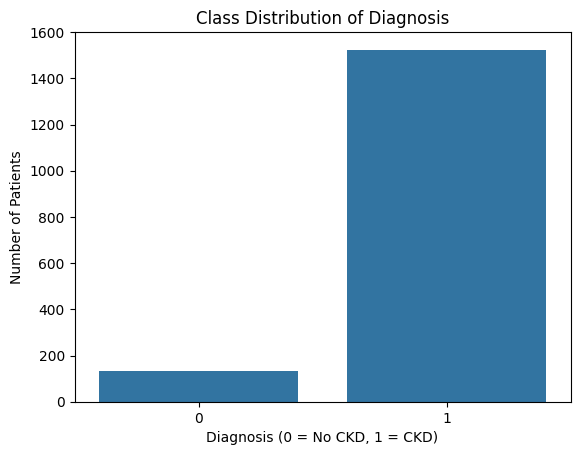

In [8]:
sns.countplot(x = 'Diagnosis', data=data)
plt.title("Class Distribution of Diagnosis")
plt.xlabel('Diagnosis (0 = No CKD, 1 = CKD)')
plt.ylabel('Number of Patients')
plt.show()
#Shows the data is not balanced, if we train the model using this data the positive (1), will dominate the prediction and will predict negative values poorly.

## Data Preprocessing

We perform the following preprocessing steps:

- Handle missing values (if any)
- Drop irrelevant or problematic columns (e.g., `DoctorInCharge` due to string values)
- Separate features (`X`) and target (`y`)
- Split the data into training and test sets while maintaining class distribution using stratification
- Address class imbalance in the training set using SMOTE (Synthetic Minority Oversampling Technique)


In [9]:
#Select Features and Targets
y = data['Diagnosis']
X = data.drop('Diagnosis', axis=1)

In [10]:
#Split the data set into train and test. And stratify to ensure there is no bias in the model. 
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 42, stratify=y)

In [11]:
X_train = X_train.drop('DoctorInCharge', axis=1)
X_test = X_test.drop('DoctorInCharge', axis=1)

In [12]:
#Applying SMOTE to make the dataset balanced
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_resampled.value_counts())

Before SMOTE: Diagnosis
1    1219
0     108
Name: count, dtype: int64
After SMOTE: Diagnosis
1    1219
0    1219
Name: count, dtype: int64


## Model Training: Random Forest Classifier

We train a Random Forest classifier as a baseline model due to its robustness and ability to handle various data types.

We evaluate its performance on the test set using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.


In [13]:
# Model Initialization
rf_model = RandomForestClassifier(random_state=42)

In [14]:
#Train the model using the updated dataset
rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [15]:
#Predicting the test dataset
y_predrf= rf_model.predict(X_test)

In [16]:
#Evaluating the Metrics of prediction 
print("Classification Report:\n", classification_report(y_test, y_predrf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_predrf))
print("\nROC_AUC Score:\n", roc_auc_score(y_test, y_predrf))
print("\nAccuracy Score:\n", accuracy_score(y_test, y_predrf))


Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.26      0.33        27
           1       0.94      0.97      0.95       305

    accuracy                           0.92       332
   macro avg       0.70      0.62      0.64       332
weighted avg       0.90      0.92      0.90       332


Confusion Matrix:
 [[  7  20]
 [  8 297]]

ROC_AUC Score:
 0.6165148755312689

Accuracy Score:
 0.9156626506024096


In [17]:
#Tuning the randomforest algorithm to improve the predcition

rf_model = RandomForestClassifier(
    n_estimators=200,         # Number of trees
    max_depth=10,             # Max depth of each tree to avoid overfitting
    min_samples_split=5,      # Minimum samples required to split a node
    class_weight='balanced',  # Adjust weights for imbalance
    random_state=42
)

rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=5, n_estimators=200, random_state=42)

In [18]:
y_predrf = rf_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_predrf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_predrf))
print("\nROC_AUC Score:\n", roc_auc_score(y_test, y_predrf))

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.30      0.34        27
           1       0.94      0.96      0.95       305

    accuracy                           0.91       332
   macro avg       0.67      0.63      0.65       332
weighted avg       0.90      0.91      0.90       332


Confusion Matrix:
 [[  8  19]
 [ 12 293]]

ROC_AUC Score:
 0.6284760170006072


## Model Training and Hyperparameter Tuning: XGBoost

Next, we train an XGBoost classifier, a powerful gradient boosting algorithm known for its high performance.

We use GridSearchCV to find the best hyperparameters that maximize the F1-score, which balances precision and recall — important for healthcare applications.

The tuned model is then evaluated on the test set.


In [19]:

import xgboost as xgb

# Initialize XGBoost classifier with scale_pos_weight to handle imbalance
# scale_pos_weight = (Number of negative samples) / (Number of positive samples)
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

xgb_model = xgb.XGBClassifier(
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight,
    random_state=42
)

In [20]:
# Train on the resampled balanced data
xgb_model.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [21]:
#Predicting 
y_predxgb = xgb_model.predict(X_test)

print(classification_report(y_test, y_predxgb))


              precision    recall  f1-score   support

           0       0.41      0.81      0.54        27
           1       0.98      0.90      0.94       305

    accuracy                           0.89       332
   macro avg       0.69      0.85      0.74       332
weighted avg       0.94      0.89      0.90       332



In [22]:
#hyperparameter Tuning using GridSearchCV

xgb_model = xgb.XGBClassifier(
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight,
    random_state=42
)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.7, 1],
    'colsample_bytree': [0.7, 1]
}


In [23]:
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='f1',           # Optimize for f1-score (balance precision & recall)
    cv=3,                  # 3-fold cross-validation
    verbose=2,
    n_jobs=-1              
)


In [24]:
grid_search.fit(X_train_resampled, y_train_resampled)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 1],
                         'learning_rate': [0.01, 0.1], 'max_depth': [4, 6, 8],
                         'n_estimators': [100, 200], 'subsample': [0.7, 1]},
             scoring='f1', verbose=2)

In [25]:
print("Best parameters found: ", grid_search.best_params_)
print("Best F1 score: ", grid_search.best_score_)

Best parameters found:  {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 1}
Best F1 score:  0.9520394204163445


In [31]:
best_model = grid_search.best_estimator_

y_predxgb = best_model.predict(X_test)

from sklearn.metrics import classification_report, roc_curve,auc
print(classification_report(y_test, y_predxgb))


              precision    recall  f1-score   support

           0       0.41      0.81      0.54        27
           1       0.98      0.90      0.94       305

    accuracy                           0.89       332
   macro avg       0.69      0.85      0.74       332
weighted avg       0.94      0.89      0.90       332



In [46]:
top_features = [
'SerumCreatinine',
'GFR',
'Itching',
'BUNLevels',
'MuscleCramps',
'Gender',
'ProteinInUrine',
'FamilyHistoryHypertension',
'FastingBloodSugar',
'HbA1c',
'SystolicBP'
]

X_train_reduced = X_train[top_features]
X_test_reduced = X_test[top_features]


In [48]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200]
}

grid_search = GridSearchCV(
    estimator=XGBClassifier(eval_metric='logloss'),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1
)

grid_search.fit(X_train_reduced, y_train)
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [49]:
y_predxgb = best_model.predict(X_test_reduced)


In [50]:
import joblib

joblib.dump(best_model, 'xgb_model_reduced.pkl')
joblib.dump(top_features, 'features.pkl')


['features.pkl']

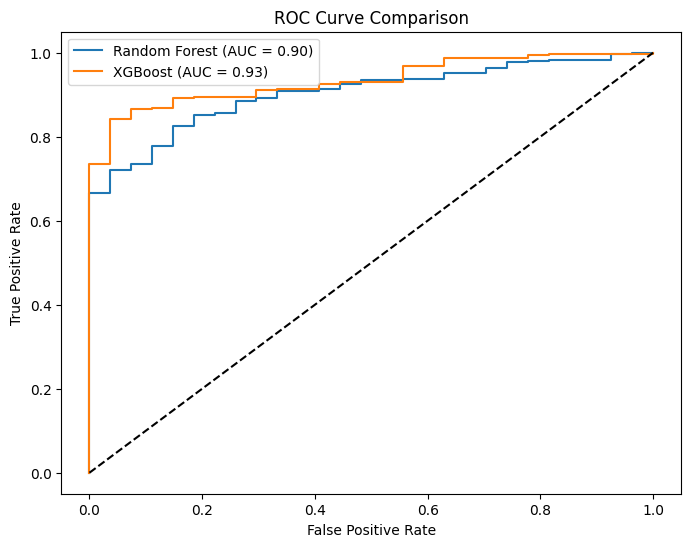

In [32]:
# Probabilities for positive class
rf_probs = rf_model.predict_proba(X_test)[:, 1]   # Random Forest
xgb_probs = best_model.predict_proba(X_test)[:, 1]  # XGBoost (tuned)

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot
plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot([0,1], [0,1], 'k--')  # baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


## Logistic Regression (Baseline Model)
We started with Logistic Regression as a baseline model. Logistic Regression is simple, interpretable, and works well when the relationship between features and the target is mostly linear.

Goal: Establish a performance benchmark.

Observation: The model achieved decent accuracy but struggled with recall for the minority class (patients without CKD). This shows the limitations of linear models on complex medical datasets.

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Pipeline: scale features -> logistic regression
log_reg_clf = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(
        solver="liblinear",  
        max_iter=1000,
        random_state=42
    ))
])

In [37]:
# Train logistic regression
log_reg_clf.fit(X_train_resampled, y_train_resampled)


Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegression(max_iter=1000, random_state=42,
                                    solver='liblinear'))])

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on test data
y_pred_log = log_reg_clf.predict(X_test)

# Classification report
print("Logistic Regression Classification Report:\n")
print(classification_report(y_test, y_pred_log))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))


Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.25      0.52      0.34        27
           1       0.95      0.87      0.91       305

    accuracy                           0.84       332
   macro avg       0.60      0.69      0.62       332
weighted avg       0.90      0.84      0.86       332

Confusion Matrix:
[[ 14  13]
 [ 41 264]]


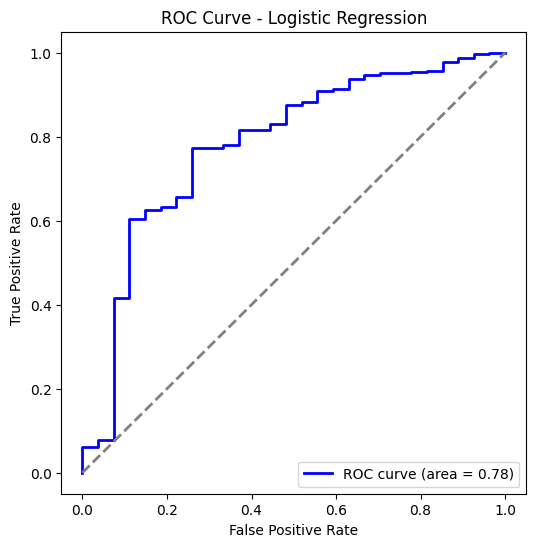

In [39]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities
y_prob_log = log_reg_clf.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_log)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()


## Support Vector Machine (SVM)
Next, we tried Support Vector Machine (SVM), which works by finding the best separating hyperplane between classes.

Initial SVM: Completely failed on the minority class (all predictions were CKD).

Balanced SVM: After applying class_weight="balanced", performance improved significantly with recall for the negative class, though accuracy slightly dropped.

Observation: This shows how class imbalance can severely affect some models, and balancing is critical.



In [41]:
from sklearn import svm   
from sklearn.svm import SVC   
svm_clf_balanced = SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42)
svm_clf_balanced.fit(X_train, y_train)

# Predictions
y_pred_svm_bal = svm_clf_balanced.predict(X_test)

# Evaluation
print("Balanced SVM Classification Report:\n")
print(classification_report(y_test, y_pred_svm_bal))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm_bal))


Balanced SVM Classification Report:

              precision    recall  f1-score   support

           0       0.24      0.63      0.34        27
           1       0.96      0.82      0.88       305

    accuracy                           0.80       332
   macro avg       0.60      0.72      0.61       332
weighted avg       0.90      0.80      0.84       332

Confusion Matrix:
[[ 17  10]
 [ 55 250]]


SVM (Balanced) ROC AUC Score: 0.81


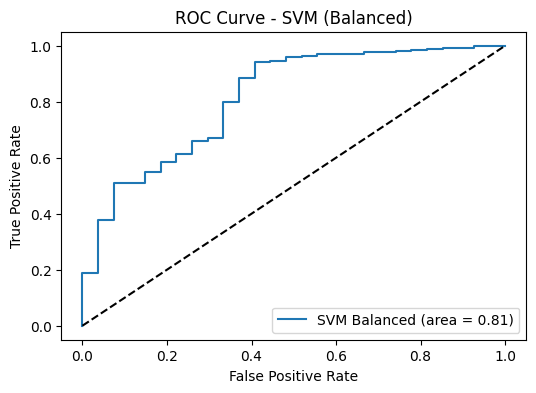

In [42]:
# Get probabilities
y_proba_svm_bal = svm_clf_balanced.decision_function(X_test)

# ROC AUC score
roc_auc = roc_auc_score(y_test, y_proba_svm_bal)
print(f"SVM (Balanced) ROC AUC Score: {roc_auc:.2f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_svm_bal)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'SVM Balanced (area = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM (Balanced)")
plt.legend(loc="lower right")
plt.show()


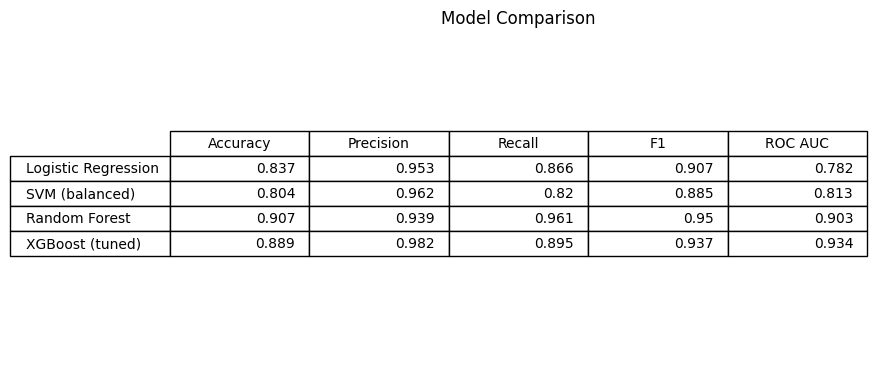

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score

rows = []

# Logistic Regression (uses: log_reg_clf, y_pred_log, y_prob_log)
acc = accuracy_score(y_test, y_pred_log)
prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred_log, average='binary', zero_division=0)
auc_lr = roc_auc_score(y_test, y_prob_log)
rows.append(["Logistic Regression", acc, prec, rec, f1, auc_lr])

# SVM (balanced) (uses: y_pred_svm_bal, y_proba_svm_bal)
acc = accuracy_score(y_test, y_pred_svm_bal)
prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred_svm_bal, average='binary', zero_division=0)
auc_svm = roc_auc_score(y_test, y_proba_svm_bal)  # decision_function scores are fine for ROC AUC
rows.append(["SVM (balanced)", acc, prec, rec, f1, auc_svm])

# Random Forest (uses: rf_model, y_predrf, rf_probs if already made)
acc = accuracy_score(y_test, y_predrf)
prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_predrf, average='binary', zero_division=0)
try:
    auc_rf = roc_auc_score(y_test, rf_probs)
except NameError:
    auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
rows.append(["Random Forest", acc, prec, rec, f1, auc_rf])

# XGBoost (tuned) (uses: best_model, y_predxgb, xgb_probs)
acc = accuracy_score(y_test, y_predxgb)
prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_predxgb, average='binary', zero_division=0)
auc_xgb_tuned = roc_auc_score(y_test, xgb_probs)
rows.append(["XGBoost (tuned)", acc, prec, rec, f1, auc_xgb_tuned])

# Build table with matplotlib
data = np.round(np.array([[r[1], r[2], r[3], r[4], r[5]] for r in rows], dtype=float), 3)
labels = [r[0] for r in rows]

fig, ax = plt.subplots(figsize=(9, len(rows)*0.8 + 1))
ax.axis('off')
table = ax.table(
    cellText=data,
    rowLabels=labels,
    colLabels=["Accuracy", "Precision", "Recall", "F1", "ROC AUC"],
    loc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)
plt.title("Model Comparison")
plt.show()


## Model Interpretation with SHAP

To increase trust and transparency, we use SHAP (SHapley Additive exPlanations) to explain the model’s predictions.

- The **summary bar plot** shows which features are most influential globally.
- The **beeswarm plot** illustrates how different feature values push predictions towards CKD or no CKD.


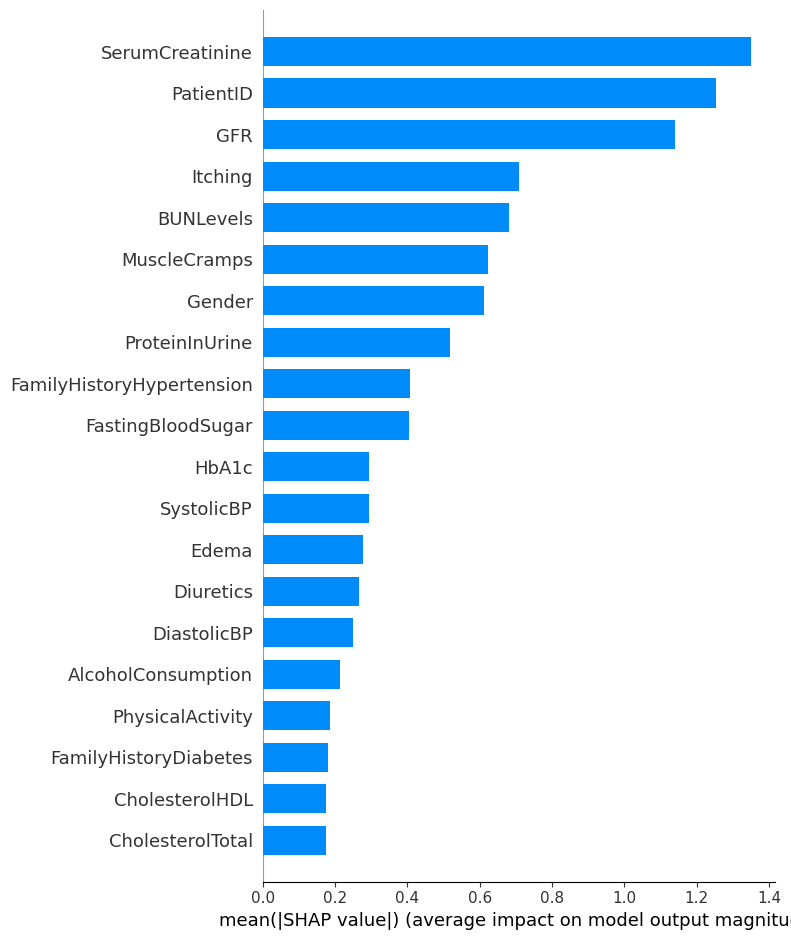

In [34]:


import shap

explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")



In [ ]:
shap.summary_plot(shap_values, X_test)


## Conclusions and Next Steps

- The XGBoost model with tuned hyperparameters provides strong predictive performance on CKD detection.
- SHAP analysis confirms that medically relevant features like Serum Creatinine and Blood Pressure play critical roles.
- Future work could include collecting more data, feature engineering, and deploying the model as a web application.
